# **Lab 4.1: Neural Networks (Regression)**

<hr>

## **1. Introduction**  
In previous practices, we learned how to solve classification and regression problems using traditional machine learning methods or models. In this practice, we will see how to solve these types of problems using **Neural Networks**, which are among the most commonly used methods today.  

These networks form the foundation of *Deep Learning* and have the capability of being highly versatile as they are composed of multiple neurons organized into layers. These neurons are also called *perceptrons*, which is why neural networks are also known as **Multilayer Perceptrons**.  

Just like with other models, `scikit-learn` provides a couple of classes that facilitate the use of these networks:  

* **MLPRegressor:** A multilayer perceptron designed to solve regression problems.  
* **MLPClassifier:** A multilayer perceptron designed to solve classification problems.  

For this type of model, we will not use these predefined classes since we are interested in understanding their architecture and internal functioning. For this reason, we will use a new library, [`tensorflow`](https://www.tensorflow.org/), which is one of the most widely used in Python for deep learning tasks, along with [`pytorch`](https://pytorch.org/).  

### **Objectives**  
In this practice, you will learn to:  
* Create and train Neural Networks.  
* Optimize their hyperparameters.  
* Add nonlinear activation functions.  

We will start by installing the library in our environment.

In [1]:
! pip install tensorflow

One of the advantages of neural networks is that they can be trained on either a CPU or a GPU.  

Later on, we will see how to train one of these networks on the GPUs of the lab computers to accelerate the training process. On your personal computer, you will likely only be able to run it on a CPU.  

Next, we load our data once again:

In [2]:
import pandas as pd

seed = 2533
data = pd.read_pickle('https://raw.githubusercontent.com/AIC-Uniovi/Sistemas-Inteligentes/refs/heads/main/datasets/f1_23_monaco.pkl')

<hr>

## **2. Regression Problems**  

We will attempt to solve the same problem as in the previous practice, which is:  

<div class="alert alert-block alert-success">
    <b>Create a model that, given the time in the first sector `<code>Sector1Time</code>, can predict the total lap time <code>LapTime</code>.</b>
</div> 

The first step will be to create the necessary datasets to train a model.  

### **2.1. Data Preprocessing**


<hr>

<div class="alert alert-block alert-info">  
    <b>Exercise:</b> Separate the X and Y from the dataframe <code>data_sector2lap</code>, split it into training and test sets (80/20) by setting a random seed, and finally <b>standardize</b> the X values.  
    <hr>  
    When X has only one column, you must use double brackets (<code>data[['column_name']]</code> instead of <code>data['column_name']</code>) for <code>StandardScaler()</code> to work correctly.  
</div>  

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_sector2lap = data[['LapTime', 'Sector1Time']].copy()
data_sector2lap['LapTime'] = data_sector2lap['LapTime'].dt.total_seconds()
data_sector2lap['Sector1Time'] = data_sector2lap['Sector1Time'].dt.total_seconds()



X = data_sector2lap[['Sector1Time']]
Y = data_sector2lap['LapTime'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

# Your code here

### **2.2. Machine Learning**  

With the data ready, we will train and evaluate the well-known machine learning models once again to compare them with our new system.

<div class="alert alert-block alert-info">  
    <b>Exercise:</b> Train and evaluate the remaining models (<i>K-Nearest Neighbors</i>, <i>Decision Trees</i>, and <i>SVR</i>) using the following function.  
</div>  

In [4]:
# This library helps us easily create tables in the console.  
! pip install tabulate  

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from tabulate import tabulate  
from sklearn.linear_model import LinearRegression  
from sklearn.dummy import DummyRegressor  

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



def evaluate_model(Y_test, preds_test, model_name):  
    metrics = [  
        ('MAE', mean_absolute_error(Y_test, preds_test)),  
        ('MSE', mean_squared_error(Y_test, preds_test)),  
        ('R²', r2_score(Y_test, preds_test))  
    ]  
    
    print(f'Results for {model_name}:')  
    print(tabulate(metrics, headers = ['Metric', 'TEST'], tablefmt = 'rounded_outline'))  
    print()  

# Baseline mean  
baseline_mean = DummyRegressor(strategy = 'mean')  
baseline_mean.fit(X_train, Y_train)  
preds_test = baseline_mean.predict(X_test)  
evaluate_model(Y_test, preds_test, 'Baseline')  

# Linear Regression  
model_linear = LinearRegression()  
model_linear.fit(X_train, Y_train)  
preds_test = model_linear.predict(X_test)  
evaluate_model(Y_test, preds_test, 'Linear')  


# K-Nearest Neighbors Regressor
model_knn = KNeighborsRegressor()  
model_knn.fit(X_train, Y_train)
preds_test_knn = model_knn.predict(X_test)
evaluate_model(Y_test, preds_test_knn, 'K-Nearest Neighbors')


# Decision Tree Regressor
model_tree = DecisionTreeRegressor(random_state=seed)
model_tree.fit(X_train, Y_train)
preds_test_tree = model_tree.predict(X_test)
evaluate_model(Y_test, preds_test_tree, 'Decision Tree')

# SVR
model_svr = SVR(kernel='rbf')  
model_svr.fit(X_train, Y_train)
preds_test_svr = model_svr.predict(X_test)
evaluate_model(Y_test, preds_test_svr, 'Support Vector Regressor')

Results for Baseline:
╭──────────┬─────────────╮
│ Metric   │        TEST │
├──────────┼─────────────┤
│ MAE      │  5.88156    │
│ MSE      │ 52.4894     │
│ R²       │ -0.00771291 │
╰──────────┴─────────────╯

Results for Linear:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 1.05594  │
│ MSE      │ 2.29783  │
│ R²       │ 0.955885 │
╰──────────┴──────────╯

Results for K-Nearest Neighbors:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 0.819804 │
│ MSE      │ 1.80144  │
│ R²       │ 0.965415 │
╰──────────┴──────────╯

Results for Decision Tree:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 1.10971  │
│ MSE      │ 3.57471  │
│ R²       │ 0.931371 │
╰──────────┴──────────╯

Results for Support Vector Regressor:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 0.735327 │
│ MSE      │ 1.73799  │
│ R²       │ 0.966633 │
╰──────────┴───────

The results should look something like this:

<center>

| Model                  | MAE Test  | MSE Test  | R² Test  |
|------------------------|-----------|-----------|----------|
| *Baseline*             | 5.882     | 52.489    | -0.008   |
| *Linear*               | 1.056     |  2.298    |  0.956   |
| *KNN*                  | 0.820     |  1.801    |  0.965   |
| *Decision Trees*       | 1.110     |  3.575    |  0.931   |
| *SVR*                  | 0.735     |  1.738    |  0.967   |

</center>

### **2.3. Neural Network**  

Once we have the datasets and results from the traditional models, we can now create our first neural network from scratch.  

The steps to create and train a neural network are as follows:  

1) Create the model architecture.  
2) Define the optimizer, loss function, and compile the model.  
3) Train and evaluate the model.  

#### **2.3.1. Create Architecture**  

The first thing we need to define is its architecture, meaning the number of fully connected layers that make up the network.  

<div class="alert alert-block alert-warning">  
    <strong>Note:</strong> As you know, the size of the input and output layers is determined by the problem at hand. In this case, we have 1 input and 1 output.  
</div>  

The simplest network in this case would be as follows:

In [6]:
import os, random  
import numpy as np  
import tensorflow as tf  

from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Input  

# Set the seeds for the libraries to ensure results are reproducible.  
os.environ['PYTHONHASHSEED'] = str(seed)  
random.seed(seed)  
np.random.seed(seed)  
tf.random.set_seed(seed)  

# Define the layers of the model  
model = Sequential()  
model.add(Input(shape = (1,)))  
model.add(Dense(1, name = 'output_layer'))

The previous code simply creates a `Sequential()` model, meaning a model where layers are added one after the other.  

Next, we introduce the following layers into it:  

* `Input()`: Input layer. It is not a layer in itself; it simply allows the model to know the size of the inputs.  
* `Dense()`: Fully connected layer ($y=Wx+b$). We specify the size as a required parameter, and `name` is optional.  

To view the final architecture of our model, we can execute the `summary()` method, which also provides information about the parameters.

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ output_layer (Dense)            │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

It is important to note that, as we mentioned earlier, since `Input()` is not actually a layer, it does not even appear in the summary.  

Another relevant piece of information is the number of parameters or weights in the model, i.e., how many $W$ and $b$ it needs to learn during training to correctly transform the input into the output.  

In this case, there are only 2: one $w$ and one $b$.  

#### **2.3.2. Compile the Model**

Compiling a model in Keras is an essential step before training it. It serves to configure the learning process, specifying how the model will be optimized and how its performance will be evaluated. Essentially, it defines the following key elements:

*   **Optimizer:** Defines the algorithm that will be used to adjust the model's weights during training, aiming to minimize the loss function. Common examples are `Adam`, `SGD`, `RMSprop`, among others. Each optimizer has its own hyperparameters (such as learning rate) that can be adjusted.

*   **Loss Function:** Measures the difference between the model's predictions and the actual values (labels). The goal of training is to **minimize this loss**. The choice of loss function depends on the type of problem (classification, regression, etc.). Examples: `categorical_crossentropy` (for multiclass classification), `binary_crossentropy` (for binary or multilabel classification), `mean_squared_error` or `mean_absolute_error` (for regression).

Next, we compile the model by specifying the `Adam` optimizer with a `learning_rate = 0.05` and a regression loss function (`mean_absolute_error`).

In [8]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
optim = Adam(learning_rate = learning_rate)
model.compile(loss = 'mean_absolute_error', optimizer = optim )

#### **2.3.3. Train and Evaluate**

The next step is the training and evaluation of the model. In `keras`, training is done through the [`.fit()`](https://keras.io/api/models/model_training_apis/) method, just like in `scikit-learn`.  

This method also takes in the training data ($X$ and $Y$) and iteratively adjusts the model's weights (the $W$ and $b$) to minimize the loss function.

Specifically, this method performs the following steps:

1) **Batch Creation:** Divides the entire training dataset into batches (blocks of examples) and obtains the model's prediction for each batch. Neural networks are designed to work with very large datasets, and often it's not feasible to train with the entire dataset at once, as we did in previous machine learning methods.
2) **Calculates the Loss:** Compares the model's predictions $\hat{Y}$ with the actual labels $Y$ and calculates the loss defined during compilation, $MAE$ in this case.
3) **Calculates Gradients:** Uses the backpropagation algorithm to compute the gradients of the loss function with respect to the model's weights. The gradients indicate the direction and magnitude of the change needed in the weights to reduce the loss.

<center>
    <div style="border-radius:5px; padding:10px; background:white; max-width:900px">
        <img src="https://i.imgur.com/1tscXrJ.png">   
    </div>
</center>

4) **Updates Weights:** Adjusts the model's weights using the optimizer based on the calculated gradients. The optimizer determines how the weights should be updated efficiently to minimize the loss.
5) **Repeats the Process:** Repeats the above steps for each of the training batches. Once all batches are processed, the entire process can be repeated for a set number of epochs.

<div class="alert alert-block alert-warning">
    <strong>Note:</strong> An epoch represents a full pass through the entire training dataset.
</div>

Next, we train the model using the training data:

In [9]:
# Train the model. The verbose parameter in the train method allows configuring the amount of information displayed in the console during training.
history = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 64, epochs = 200, verbose = 2)

Epoch 1/200
13/13 - 0s - 23ms/step - loss: 82.7374 - val_loss: 82.4819
Epoch 2/200
13/13 - 0s - 4ms/step - loss: 82.7243 - val_loss: 82.4689
Epoch 3/200
13/13 - 0s - 4ms/step - loss: 82.7113 - val_loss: 82.4559
Epoch 4/200
13/13 - 0s - 4ms/step - loss: 82.6983 - val_loss: 82.4430
Epoch 5/200
13/13 - 0s - 4ms/step - loss: 82.6853 - val_loss: 82.4300
Epoch 6/200
13/13 - 0s - 4ms/step - loss: 82.6723 - val_loss: 82.4170
Epoch 7/200
13/13 - 0s - 4ms/step - loss: 82.6593 - val_loss: 82.4040
Epoch 8/200
13/13 - 0s - 4ms/step - loss: 82.6462 - val_loss: 82.3911
Epoch 9/200
13/13 - 0s - 5ms/step - loss: 82.6332 - val_loss: 82.3781
Epoch 10/200
13/13 - 0s - 4ms/step - loss: 82.6202 - val_loss: 82.3651
Epoch 11/200
13/13 - 0s - 4ms/step - loss: 82.6072 - val_loss: 82.3521
Epoch 12/200
13/13 - 0s - 4ms/step - loss: 82.5942 - val_loss: 82.3392
Epoch 13/200
13/13 - 0s - 4ms/step - loss: 82.5812 - val_loss: 82.3262
Epoch 14/200
13/13 - 0s - 4ms/step - loss: 82.5682 - val_loss: 82.3132
Epoch 15/200
1

<div class="alert alert-block alert-warning">
    <strong>Note:</strong> Every time you run the previous block, <strong>training will continue</strong> from where it left off. To train the model from scratch, you would need to recreate and recompile it.
</div>

As you can see, there is an argument in the `fit` method that we haven't discussed: `validation_split`.

This argument reserves a fraction of the training data to use it as a validation set; in other words, it separates 20% of the examples from the training set (in this case, since `validation_split=0.2`).

So now, our dataset is split into three distinct blocks: Train, Validation, and Test. This approach is also known as **metavalidation**.

##### **Metavalidation**

Until now, to validate our model, we have used **simple validation** or hold-out, meaning we split it into: Train and Test.

This approach is very valid for cases where the models we want to evaluate do not have **hyperparameters**, like linear regression.

<div class="alert alert-block alert-warning">
    <strong>Note:</strong> The validation set is used to adjust the model's hyperparameters. <hr> 
    Remember that a hyperparameter is any value we can set when creating a model, for example, the K in KNN.
</div>

Neural networks have multiple hyperparameters to adjust such as `learning rate`, `batch size`, `epochs`, `number of layers`, `number of neurons`, etc. Therefore, a validation set is necessary.

Now, the training process changes slightly: Based on the training data, the model calculates the loss and updates the weights accordingly, then *calculates the loss on the validation set* **but does not update the weights with this data**.

This allows:

* **Monitor overfitting:** If performance on the training set keeps improving but performance on the validation set stagnates or worsens, this indicates that the model is starting to overfit the training data and losing its ability to generalize to new data.
* **Adjust hyperparameters:** We adjust the values of hyperparameters to select the configuration that produces the best performance on the validation data.

<hr>

##### **Why don't we use Test directly to adjust the hyperparameters?**

Imagine you want to bake the perfect cake to take to a baking contest.

* **Training set (train):** These are all the tests you do at home with different recipes, temperatures, and times. Here, you try many combinations to learn how each change affects the outcome.

* **Validation set (val):** Every time you bake a cake at home, you let your friends or family try it. They tell you if it's too dry, too sweet, if the texture is good... With that feedback, you adjust the recipe: more sugar? less time in the oven? This is the process of adjusting hyperparameters.

* **Test set (test):** This is the contest jury. You've never let them taste any of your cakes. They will evaluate whether, beyond your adjustments, your recipe truly works.

**Where's the trap?**

If, before the contest, you have the jury taste several cakes and tell you what to change, when you go to the contest, you'll already know what they like. 
You won't be testing if your recipe is good in general, but rather you'll have made a cake tailored to them.

<hr>

In summary: 
* **Train:** The dataset used to train the model, adjusting its weights to minimize the loss function. 
* **Validation:** The dataset used to monitor overfitting and optimize the model's hyperparameters, **but not the weights**. 
* **Test:** The dataset used to evaluate the final performance of the model trained with the optimal hyperparameters and data that was not used previously (neither for training nor for hyperparameter adjustment).

The `fit()` method returns an object that stores the entire history of the model's training across the epochs. In this case, we store the result in `history`.

Now let's create a function to visualize the evolution of the training and validation losses:

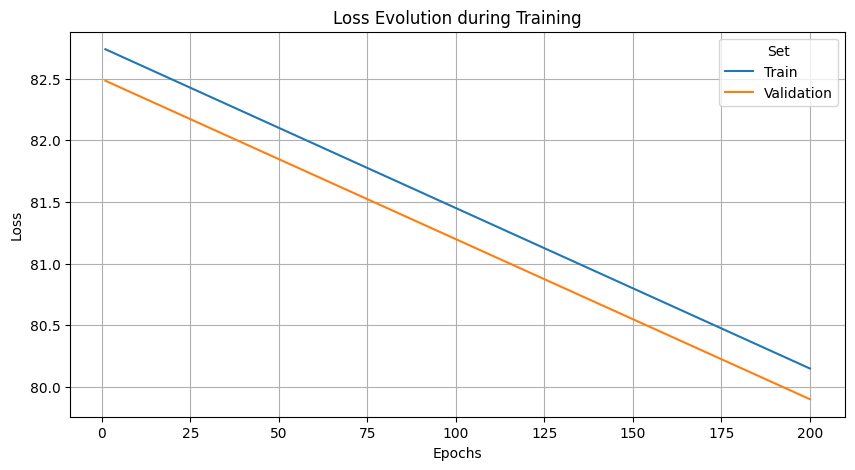

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_loss_history(history):
    # Extract the history data
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', None)  # It may not exist if validation was not used
    epochs = range(1, len(loss) + 1)

    # Create a DataFrame for seaborn
    data = pd.DataFrame({ 'Epoch': list(epochs) * 2, 'Loss': loss + (val_loss if val_loss else []), 'Type': ['Train'] * len(loss) + (['Validation'] * len(val_loss) if val_loss else []) })

    # Create the plot
    plt.figure(figsize = (10, 5))
    sns.lineplot(data = data, x = 'Epoch', y = 'Loss', hue = 'Type')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Evolution during Training')
    plt.legend(title = 'Set')
    plt.grid(True)
    plt.show()

# Call the function (after training the model)
plot_loss_history(history)

<div class="alert alert-block alert-info">
    <b>Exercise:</b> For simplicity, let's combine the creation and compilation of the network into one function. Complete the following code and retrain the network from scratch.
</div>

Epoch 1/200
13/13 - 0s - 20ms/step - loss: 82.7170 - val_loss: 82.5634
Epoch 2/200
13/13 - 0s - 5ms/step - loss: 82.7039 - val_loss: 82.5504
Epoch 3/200
13/13 - 0s - 4ms/step - loss: 82.6908 - val_loss: 82.5374
Epoch 4/200
13/13 - 0s - 4ms/step - loss: 82.6778 - val_loss: 82.5244
Epoch 5/200
13/13 - 0s - 4ms/step - loss: 82.6648 - val_loss: 82.5114
Epoch 6/200
13/13 - 0s - 4ms/step - loss: 82.6518 - val_loss: 82.4985
Epoch 7/200
13/13 - 0s - 4ms/step - loss: 82.6388 - val_loss: 82.4855
Epoch 8/200
13/13 - 0s - 4ms/step - loss: 82.6258 - val_loss: 82.4725
Epoch 9/200
13/13 - 0s - 4ms/step - loss: 82.6128 - val_loss: 82.4595
Epoch 10/200
13/13 - 0s - 4ms/step - loss: 82.5998 - val_loss: 82.4466
Epoch 11/200
13/13 - 0s - 4ms/step - loss: 82.5868 - val_loss: 82.4336
Epoch 12/200
13/13 - 0s - 4ms/step - loss: 82.5738 - val_loss: 82.4206
Epoch 13/200
13/13 - 0s - 4ms/step - loss: 82.5608 - val_loss: 82.4077
Epoch 14/200
13/13 - 0s - 4ms/step - loss: 82.5478 - val_loss: 82.3947
Epoch 15/200
1

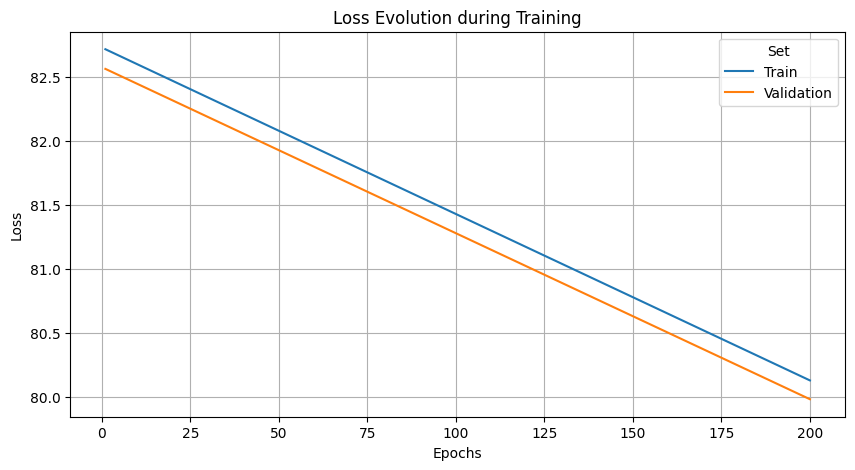

In [11]:
def neural_network_one(learning_rate):
    # Create and compile the model

    model = Sequential()
    model.add(Input(shape = (1,)))  
    model.add(Dense(1, name = 'output_layer'))    

    optim = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_absolute_error', optimizer = optim )
    # Your code here

    return model

# Create the network from scratch
model_1 = neural_network_one(learning_rate = 0.001)



# Train
# Your code here
history_1 = model_1.fit(X_train, Y_train, validation_split = 0.2, batch_size = 64, epochs = 200, verbose = 2)

# Visualize training
# Your code here
plot_loss_history(history_1)



##### **Hyperparameter Tuning**

Once everything is combined into a single code block, we can move on to the hyperparameter tuning part.

There are many things we can adjust (`batch size`, `epochs`, `learning rate`, ...) but we will focus on the `learning rate`.

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Record the results of the last epoch of the previous model in the following table and perform the necessary experiments to complete the rest of the rows.
</div>

<center>

| Model                    | MAE Train  | MAE Val |
|---------------------------|------------|---------|
| *Neural Network (lr=0.001)* |            |         |
| *Neural Network (lr=0.05)*  |            |         |
| *Neural Network (lr=0.1)*   |            |         |

<center>

In [12]:
X_test.shape

(252, 1)

Epoch 1/200
13/13 - 0s - 26ms/step - loss: 82.4396 - val_loss: 81.9254
Epoch 2/200
13/13 - 0s - 4ms/step - loss: 81.7851 - val_loss: 81.2761
Epoch 3/200
13/13 - 0s - 4ms/step - loss: 81.1344 - val_loss: 80.6273
Epoch 4/200
13/13 - 0s - 4ms/step - loss: 80.4840 - val_loss: 79.9786
Epoch 5/200
13/13 - 0s - 4ms/step - loss: 79.8337 - val_loss: 79.3299
Epoch 6/200
13/13 - 0s - 4ms/step - loss: 79.1834 - val_loss: 78.6812
Epoch 7/200
13/13 - 0s - 4ms/step - loss: 78.5330 - val_loss: 78.0325
Epoch 8/200
13/13 - 0s - 4ms/step - loss: 77.8827 - val_loss: 77.3839
Epoch 9/200
13/13 - 0s - 4ms/step - loss: 77.2324 - val_loss: 76.7352
Epoch 10/200
13/13 - 0s - 4ms/step - loss: 76.5821 - val_loss: 76.0865
Epoch 11/200
13/13 - 0s - 4ms/step - loss: 75.9317 - val_loss: 75.4378
Epoch 12/200
13/13 - 0s - 4ms/step - loss: 75.2814 - val_loss: 74.7892
Epoch 13/200
13/13 - 0s - 4ms/step - loss: 74.6311 - val_loss: 74.1405
Epoch 14/200
13/13 - 0s - 4ms/step - loss: 73.9807 - val_loss: 73.4918
Epoch 15/200
1

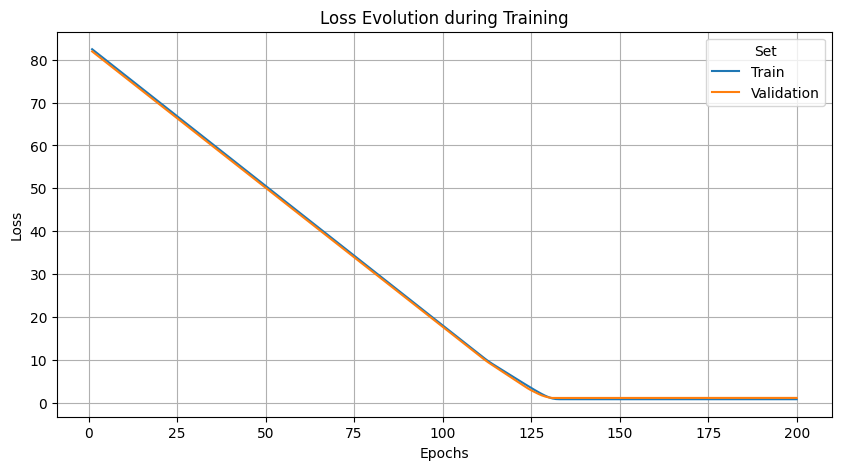

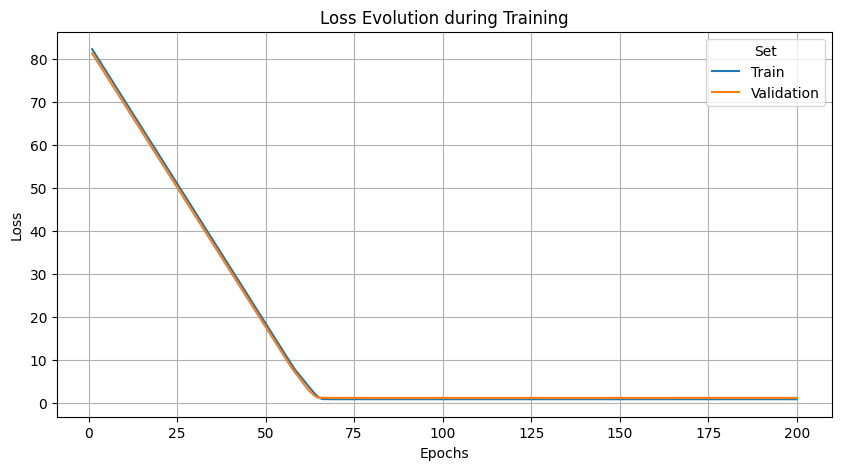

In [13]:
# Your code here

#lr = 0.05
model_2 = neural_network_one(learning_rate=0.05)
history_2 = model_2.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=200, verbose=2)

# lr = 0.1
model_3 = neural_network_one(learning_rate=0.1)
history_3 = model_3.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=200, verbose=2)


plot_loss_history(history_2)
plot_loss_history(history_3)

#la mjr es el 2(lr= 0.05) pq el loss es más bajo 0.8417 



<div class="alert alert-block alert-info">
    <b>Exercise:</b> Train the final model with the best <code>learning_rate</code> and evaluate on test using the <code>.predict()</code> method and the <code>evaluate_model()</code> function created previously.
    <hr>
    Add the results to the table.
</div>

<center>

| Model                   | MAE Test  | MSE Test  | R² Test  |
|-------------------------|-----------|-----------|----------|
| *Baseline*              | 5.882     | 52.489    | -0.008   |
| *Linear*                | 1.056     |  2.298    |  0.956   |
| *KNN*                   | 0.820     |  1.801    |  0.965   |
| *Decision Trees*        | 1.110     |  3.575    |  0.931   |
| *SVR*                   | 0.735     |  1.738    |  0.967   |
| *Neural Network Linear* |           |           |          |

</center>

In [14]:
# Your code here

final_preds_test = model_2.predict(X_test)

evaluate_model(Y_test, final_preds_test, 'Neural Network Linear')


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Results for Neural Network Linear:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 0.793767 │
│ MSE      │ 1.78325  │
│ R²       │ 0.965764 │
╰──────────┴──────────╯



##### **Adding Non-Linearity**

We will make some modifications and create a different, slightly more complex model to see if we can improve performance.

As you may recall, not all problems have a linear solution. A basic neural network like ours is limited to performing linear combinations of numbers (sums and multiplications), meaning it transforms the input into the output using the formula $y = Wx + b$.

To introduce non-linearity, we need to incorporate **non-linear activation functions**. These functions are applied to the output of each layer, allowing the network to learn more complex relationships between inputs and outputs. Some common activation functions include `ReLU`, `sigmoid`, and `tanh`. By adding these functions, the network can approximate non-linear functions and solve more challenging problems.

<center>
    <div style="border-radius:5px; padding:10px; background:white; max-width:900px">
        <img src="https://i.imgur.com/e7kd5fs.png">   
    </div>
</center>

Our current model has only one layer, the output layer. If we were to apply any of these functions to this layer, not only would we fail to introduce non-linearity, but we would also significantly restrict the range of values the model can predict.

For example, if we only add a `sigmoid` function to the final layer, we would have a linear model whose output will **always** be limited to the range between 0 and 1. This is not ideal for our regression problem.

To achieve non-linearity and avoid this limitation—while allowing the model to predict in a range of values between $(-\infty , \infty)$—we will add a hidden (or intermediate) layer and apply activation in this layer. This way, the final layer can generate outputs without the restrictions imposed by the activation function while still achieving non-linearity.

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Create, within the provided function, a new neural network, but this time with two layers, the hidden one of <b>size 10</b> and with an activation function of <code>tanh</code> to add non-linearity.
    <br>
    Check the documentation for the <a href="https://keras.io/api/layers/core_layers/dense/"><code>Dense()</code></a> layer.
    <hr>
    Find the best <code>learning_rate</code> and evaluate on test with the best version. Fill in both tables.
</div>

<center>

| Model                    | MAE Train  | MAE Val |
|---------------------------|------------|---------|
| *Neural Network (lr=0.001)* |            |         |
| *Neural Network (lr=0.05)*  |            |         |
| *Neural Network (lr=0.1)*   |            |         |

<center>
<br> 
<center>

| Model                   | MAE Test  | MSE Test  | R² Test  |
|--------------------------|-----------|-----------|----------|
| *Baseline*               | 5.882     | 52.489    | -0.008   |
| *Linear*                 | 1.056     |  2.298    |  0.956   |
| *KNN*                    | 0.820     |  1.801    |  0.965   |
| *Decision Trees*         | 1.110     |  3.575    |  0.931   |
| *SVR*                    | 0.735     |  1.738    |  0.967   |
| *Linear Neural Network*  |           |           |          |
| *Non-Linear Neural Network* |        |           |          |

</center>

Epoch 1/200
13/13 - 0s - 26ms/step - loss: 82.6256 - val_loss: 82.3723
Epoch 2/200
13/13 - 0s - 4ms/step - loss: 82.5540 - val_loss: 82.2988
Epoch 3/200
13/13 - 0s - 4ms/step - loss: 82.4793 - val_loss: 82.2212
Epoch 4/200
13/13 - 0s - 4ms/step - loss: 82.4003 - val_loss: 82.1387
Epoch 5/200
13/13 - 0s - 4ms/step - loss: 82.3160 - val_loss: 82.0506
Epoch 6/200
13/13 - 0s - 4ms/step - loss: 82.2261 - val_loss: 81.9567
Epoch 7/200
13/13 - 0s - 4ms/step - loss: 82.1303 - val_loss: 81.8567
Epoch 8/200
13/13 - 0s - 4ms/step - loss: 82.0283 - val_loss: 81.7505
Epoch 9/200
13/13 - 0s - 4ms/step - loss: 81.9201 - val_loss: 81.6382
Epoch 10/200
13/13 - 0s - 4ms/step - loss: 81.8058 - val_loss: 81.5196
Epoch 11/200
13/13 - 0s - 4ms/step - loss: 81.6854 - val_loss: 81.3951
Epoch 12/200
13/13 - 0s - 4ms/step - loss: 81.5590 - val_loss: 81.2645
Epoch 13/200
13/13 - 0s - 4ms/step - loss: 81.4267 - val_loss: 81.1283
Epoch 14/200
13/13 - 0s - 4ms/step - loss: 81.2888 - val_loss: 80.9864
Epoch 15/200
1

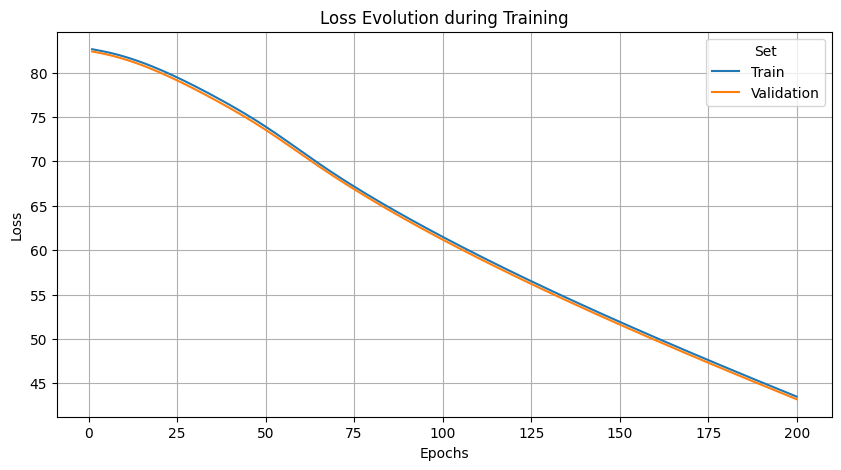

Epoch 1/200
13/13 - 0s - 26ms/step - loss: 80.6808 - val_loss: 76.6982
Epoch 2/200
13/13 - 0s - 4ms/step - loss: 72.7063 - val_loss: 66.9747
Epoch 3/200
13/13 - 0s - 4ms/step - loss: 62.7436 - val_loss: 57.2150
Epoch 4/200
13/13 - 0s - 4ms/step - loss: 53.3594 - val_loss: 48.2081
Epoch 5/200
13/13 - 0s - 4ms/step - loss: 44.5485 - val_loss: 39.6113
Epoch 6/200
13/13 - 0s - 4ms/step - loss: 36.0859 - val_loss: 31.2957
Epoch 7/200
13/13 - 0s - 4ms/step - loss: 27.8654 - val_loss: 23.1804
Epoch 8/200
13/13 - 0s - 4ms/step - loss: 19.8190 - val_loss: 15.2113
Epoch 9/200
13/13 - 0s - 4ms/step - loss: 11.9015 - val_loss: 7.3524
Epoch 10/200
13/13 - 0s - 4ms/step - loss: 5.5287 - val_loss: 5.1843
Epoch 11/200
13/13 - 0s - 4ms/step - loss: 5.3310 - val_loss: 5.0059
Epoch 12/200
13/13 - 0s - 5ms/step - loss: 4.8118 - val_loss: 4.5473
Epoch 13/200
13/13 - 0s - 4ms/step - loss: 4.6060 - val_loss: 4.3102
Epoch 14/200
13/13 - 0s - 4ms/step - loss: 4.1884 - val_loss: 3.7936
Epoch 15/200
13/13 - 0s -

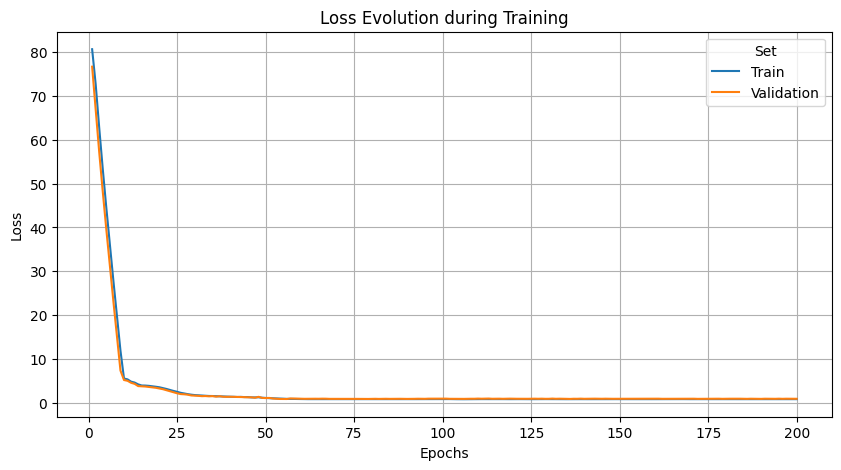

Epoch 1/200
13/13 - 0s - 25ms/step - loss: 77.8524 - val_loss: 69.1706
Epoch 2/200
13/13 - 0s - 4ms/step - loss: 61.2232 - val_loss: 51.3341
Epoch 3/200
13/13 - 0s - 4ms/step - loss: 44.1640 - val_loss: 34.8986
Epoch 4/200
13/13 - 0s - 4ms/step - loss: 27.9289 - val_loss: 18.8919
Epoch 5/200
13/13 - 0s - 4ms/step - loss: 12.0976 - val_loss: 4.7191
Epoch 6/200
13/13 - 0s - 4ms/step - loss: 6.1291 - val_loss: 6.6488
Epoch 7/200
13/13 - 0s - 4ms/step - loss: 6.0030 - val_loss: 4.8519
Epoch 8/200
13/13 - 0s - 4ms/step - loss: 4.8651 - val_loss: 4.5921
Epoch 9/200
13/13 - 0s - 4ms/step - loss: 4.5753 - val_loss: 4.0685
Epoch 10/200
13/13 - 0s - 4ms/step - loss: 4.1391 - val_loss: 3.9095
Epoch 11/200
13/13 - 0s - 4ms/step - loss: 3.9886 - val_loss: 3.7174
Epoch 12/200
13/13 - 0s - 4ms/step - loss: 3.8351 - val_loss: 3.5640
Epoch 13/200
13/13 - 0s - 4ms/step - loss: 3.5722 - val_loss: 3.1600
Epoch 14/200
13/13 - 0s - 4ms/step - loss: 3.1779 - val_loss: 2.5622
Epoch 15/200
13/13 - 0s - 4ms/ste

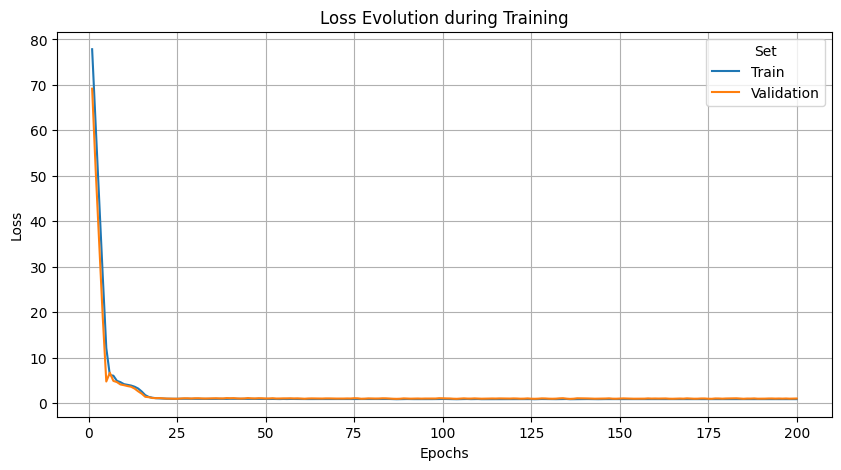

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Results for Non-Linear Neural Network:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 0.745158 │
│ MSE      │ 1.53984  │
│ R²       │ 0.970437 │
╰──────────┴──────────╯



In [15]:
def neural_network_two(learning_rate):
    # Create and compile the model
    model = Sequential()
    model.add(Input(shape=(1,)))
    model.add(Dense(10, activation='tanh', name='hidden_layer'))
    model.add(Dense(1, name='output_layer'))
    
    # Your code here

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_absolute_error', optimizer=optimizer)

    return model

# Create the network from scratch

# Your code here

# lr = 0.001
model_1 = neural_network_two(learning_rate=0.001)
history_1 = model_1.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=200, verbose=2)
plot_loss_history(history_1)
# lr = 0.05
model_2 = neural_network_two(learning_rate=0.05)
history_2 = model_2.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=200, verbose=2)
plot_loss_history(history_2)
# lr = 0.1
model_3 = neural_network_two(learning_rate=0.1)
history_3 = model_3.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=200, verbose=2)
plot_loss_history(history_3)



final_preds_test = model_2.predict(X_test)
evaluate_model(Y_test, final_preds_test, 'Non-Linear Neural Network')




<div class="alert alert-block alert-info">
    <b>Exercise:</b> Which model would you choose?
</div>

**Answer:**  

La mjr vuelve a ser la de 0.05 con el loss más bajo (0.8165)

### **2.4. Multiple Inputs**

<div class="alert alert-block alert-info">
    <b>Exercise:</b> Create a pair of networks capable of predicting <i>LapTime</i> from <i>SpeedI1</i>, <i>SpeedI2</i>, <i>SpeedFL</i>, <i>SpeedST</i>, and <i>TyreLife</i>. Adjust the hyperparameters for each model.
</div>

<center>

| Model                    | MAE Test  | MSE Test  | R² Test  |
|--------------------------|-----------|-----------|----------|
| *Baseline*               | 5.858     | 54.094    | -0.008   |
| *Linear*                 | 0.932     | 1.678     | 0.969    |
| *KNN*                    | 0.785     | 1.743     | 0.968    |
| *Decision Trees*         | 0.899     | 1.841     | 0.966    |
| *SVR*                    | 0.938     | 2.724     | 0.949    |
| *Neural Network 1*       |           |           |          |
| *Neural Network 2*       |           |           |          |

</center>

In [16]:
data_lap_time = data[['LapTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'TyreLife']].copy()
data_lap_time = data_lap_time.dropna()
data_lap_time['LapTime'] = data_lap_time['LapTime'].dt.total_seconds()

X = data_lap_time[['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'TyreLife']]
Y = data_lap_time['LapTime']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = seed, test_size = .2)

standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

# Baseline mean
baseline_mean = DummyRegressor(strategy = 'mean')
baseline_mean.fit(X_train, Y_train)
preds_test = baseline_mean.predict(X_test)
evaluate_model(Y_test, preds_test, 'Baseline')

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train, Y_train)
preds_test = model_linear.predict(X_test)
evaluate_model(Y_test, preds_test, 'Linear')

# KNN
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, Y_train)
preds_test = model_knn.predict(X_test)
evaluate_model(Y_test, preds_test, 'KNN')

# Decision Trees
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, Y_train)
preds_test = model_tree.predict(X_test)
evaluate_model(Y_test, preds_test, 'Decision Trees')

# SVR
model_svr = SVR()
model_svr.fit(X_train, Y_train)
preds_test = model_svr.predict(X_test)
evaluate_model(Y_test, preds_test, 'SVR')

Results for Baseline:
╭──────────┬─────────────╮
│ Metric   │        TEST │
├──────────┼─────────────┤
│ MAE      │  5.8583     │
│ MSE      │ 54.0935     │
│ R²       │ -0.00770175 │
╰──────────┴─────────────╯

Results for Linear:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 0.932171 │
│ MSE      │ 1.67787  │
│ R²       │ 0.968743 │
╰──────────┴──────────╯

Results for KNN:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 0.785469 │
│ MSE      │ 1.74254  │
│ R²       │ 0.967538 │
╰──────────┴──────────╯

Results for Decision Trees:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 0.928435 │
│ MSE      │ 1.97284  │
│ R²       │ 0.963248 │
╰──────────┴──────────╯

Results for SVR:
╭──────────┬──────────╮
│ Metric   │     TEST │
├──────────┼──────────┤
│ MAE      │ 0.938392 │
│ MSE      │ 2.72359  │
│ R²       │ 0.949263 │
╰──────────┴──────────╯



Epoch 1/200
12/12 - 0s - 29ms/step - loss: 82.0996 - val_loss: 81.0120
Epoch 2/200
12/12 - 0s - 5ms/step - loss: 79.4084 - val_loss: 77.3266
Epoch 3/200
12/12 - 0s - 5ms/step - loss: 75.2953 - val_loss: 73.1370
Epoch 4/200
12/12 - 0s - 5ms/step - loss: 71.2344 - val_loss: 69.2413
Epoch 5/200
12/12 - 0s - 5ms/step - loss: 67.4383 - val_loss: 65.5494
Epoch 6/200
12/12 - 0s - 5ms/step - loss: 63.8134 - val_loss: 61.9961
Epoch 7/200
12/12 - 0s - 5ms/step - loss: 60.3067 - val_loss: 58.5415
Epoch 8/200
12/12 - 0s - 5ms/step - loss: 56.8852 - val_loss: 55.1579
Epoch 9/200
12/12 - 0s - 5ms/step - loss: 53.5263 - val_loss: 51.8275
Epoch 10/200
12/12 - 0s - 5ms/step - loss: 50.2148 - val_loss: 48.5382
Epoch 11/200
12/12 - 0s - 5ms/step - loss: 46.9404 - val_loss: 45.2815
Epoch 12/200
12/12 - 0s - 5ms/step - loss: 43.6956 - val_loss: 42.0511
Epoch 13/200
12/12 - 0s - 5ms/step - loss: 40.4751 - val_loss: 38.8424
Epoch 14/200
12/12 - 0s - 5ms/step - loss: 37.2747 - val_loss: 35.6520
Epoch 15/200
1

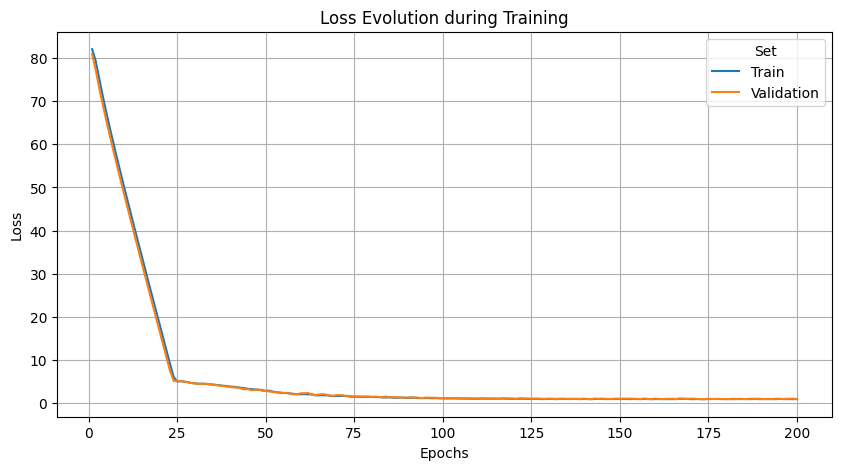

In [26]:
# Your code here

def neural_network_one(learning_rate):
    # Create and compile the model

    model = Sequential()
    model.add(Input(shape = (5,)))  
    model.add(Dense(4, activation='tanh', name='hidden_layer_1'))  
    model.add(Dense(1, name = 'output_layer'))    

    optim = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_absolute_error', optimizer = optim )
    # Your code here

    return model

model_1 = neural_network_one(learning_rate=0.05)
history_1 = model_1.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=200, verbose=2)
preds_test_1 = model_1.predict(X_test)
evaluate_model(Y_test, preds_test_1, 'Neural Network 1')
plot_loss_history(history_1)




Epoch 1/200
12/12 - 0s - 35ms/step - loss: 81.1334 - val_loss: 79.2909
Epoch 2/200
12/12 - 0s - 5ms/step - loss: 77.4038 - val_loss: 75.4718
Epoch 3/200
12/12 - 0s - 5ms/step - loss: 73.7799 - val_loss: 72.0086
Epoch 4/200
12/12 - 0s - 5ms/step - loss: 70.3480 - val_loss: 68.6155
Epoch 5/200
12/12 - 0s - 5ms/step - loss: 66.9853 - val_loss: 65.2919
Epoch 6/200
12/12 - 0s - 5ms/step - loss: 63.6889 - val_loss: 62.0277
Epoch 7/200
12/12 - 0s - 5ms/step - loss: 60.4456 - val_loss: 58.8084
Epoch 8/200
12/12 - 0s - 5ms/step - loss: 57.2418 - val_loss: 55.6226
Epoch 9/200
12/12 - 0s - 5ms/step - loss: 54.0675 - val_loss: 52.4619
Epoch 10/200
12/12 - 0s - 5ms/step - loss: 50.9157 - val_loss: 49.3206
Epoch 11/200
12/12 - 0s - 5ms/step - loss: 47.7815 - val_loss: 46.1948
Epoch 12/200
12/12 - 0s - 5ms/step - loss: 44.6614 - val_loss: 43.0816
Epoch 13/200
12/12 - 0s - 5ms/step - loss: 41.5529 - val_loss: 39.9787
Epoch 14/200
12/12 - 0s - 5ms/step - loss: 38.4539 - val_loss: 36.8845
Epoch 15/200
1

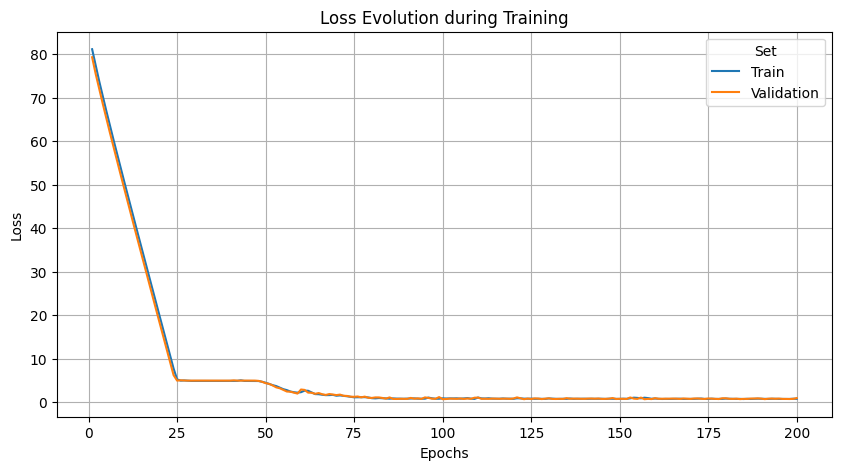

In [25]:
def neural_network_two(learning_rate):
  
    # Create and compile the model
    model = Sequential()
    model.add(Input(shape=(5,)))  
    model.add(Dense(4, activation='tanh', name='hidden_layer_1'))  
    model.add(Dense(4, activation='tanh', name='hidden_layer_2')) 
    model.add(Dense(1, name='output_layer'))  
    
    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_absolute_error', optimizer=optimizer)

    return model


model_2 = neural_network_two(learning_rate=0.05)
history_2 = model_2.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=200, verbose=2)

preds_test_2 = model_2.predict(X_test)


evaluate_model(Y_test, preds_test_2, 'Neural Network 2')


plot_loss_history(history_2)
